In [1]:
#Testing Pyspark Installation
import findspark
findspark.init()
import pyspark


# Initializing Spark

In [2]:
#intialize Spark Context
#from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
spark= SparkSession.builder.appName('Dimension Reduce').getOrCreate()
spark


# Importing Libraries

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
#Importing Forcast sheets from the folders
xlpath=os.chdir('/Users/Asus/Documents/InternCsv/forcast_july')
files = os.listdir(xlpath)

In [5]:
#segregating excel files from the Given Data
files_xls = [f for f in files if f[-3:] == 'xls']

In [6]:
#Putting data into pandas data Frame
df = pd.DataFrame()

In [7]:
for f in files_xls:
    data = pd.read_excel(f, 'Day Ahead Dispatch',skiprows=2,skipfooter=30,usecols="A:AW")
    data['Date']="2020 - 07 - "+f[4:6]
    df = df.append(data)

In [8]:
#Listing out the DataFrame
df

,Unnamed: 0,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,...,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00,Date
0,WPS,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,...,47.241,47.241,0.000,0.000,0.000,0.000,0.000,10.000,10.000,2020 - 07 - 10
1,Cany,28.065,11.040,11.040,0.000,0.000,0.000,0.000,0.0000,11.0400,...,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,19.700,2020 - 07 - 10
2,Olax,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.0000,10.0000,...,54.000,38.820,10.000,10.000,10.000,10.000,10.000,10.000,10.000,2020 - 07 - 10
3,Nlax,60.472,60.472,60.472,60.472,60.472,60.472,60.472,60.4720,60.4720,...,71.915,60.472,60.472,60.472,60.472,60.472,60.472,60.472,60.472,2020 - 07 - 10
4,Polp,78.479,43.419,28.770,28.770,15.620,15.620,15.620,7.2701,7.2701,...,78.479,78.479,65.290,38.314,38.314,38.314,38.314,38.314,38.314,2020 - 07 - 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,VPOWER_Galle,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2020 - 07 - 9.
38,ALTAAQ_Mahiya,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2020 - 07 - 9.
39,ALTAAQ_Polon,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2020 - 07 - 9.
40,VPOWER_Hamb,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2020 - 07 - 9.


In [9]:
#Renaming the Unnamed Column into Plants and creating and Index
df = df.rename(columns={'Unnamed: 0': 'Plant'}, index={'ONE': 'Row_1'})
df.head()

,Plant,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,...,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00,Date
0,WPS,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,...,47.241,47.241,0.000,0.000,0.000,0.000,0.000,10.000,10.000,2020 - 07 - 10
1,Cany,28.065,11.040,11.040,0.000,0.000,0.000,0.000,0.0000,11.0400,...,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,19.700,2020 - 07 - 10
2,Olax,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.0000,10.0000,...,54.000,38.820,10.000,10.000,10.000,10.000,10.000,10.000,10.000,2020 - 07 - 10
3,Nlax,60.472,60.472,60.472,60.472,60.472,60.472,60.472,60.4720,60.4720,...,71.915,60.472,60.472,60.472,60.472,60.472,60.472,60.472,60.472,2020 - 07 - 10
4,Polp,78.479,43.419,28.770,28.770,15.620,15.620,15.620,7.2701,7.2701,...,78.479,78.479,65.290,38.314,38.314,38.314,38.314,38.314,38.314,2020 - 07 - 10


In [10]:
#We can Also Use df.rename function for index name Change

df.replace('Cany     ','Canyon',inplace=True)
df.replace('Olax       ','Olax',inplace=True)
df.replace('ACE (Matara)','ACE Matara',inplace=True)
df.replace('Ace (Embilipitiya)','ACE EMBP',inplace=True)
df.replace('Victoria','Vict',inplace=True)
df.replace('GT 07','KPS(GT7)',inplace=True)
df.replace('KPS','KPS(GT)',inplace=True)
df.replace('Sama','Sam',inplace=True)
df.replace('VPOWER_Palle','VPOWER Palle.',inplace=True)   
df.replace('Uthuru_Janani','Uthuru Janani',inplace=True)
df.replace('SPS A','Sapu A',inplace=True)
df.replace('SPS B','Sapu B',inplace=True)
df.replace('ALTAAQ_Polon','ALTAQQA-Pol.',inplace=True)
df.replace('ALTAAQ_Mahiya','ALTAQQA-Mahi.',inplace=True)
df.replace('VPOWER_Horana','VPOWER Horona',inplace=True)
df.replace('WPS     ','WPS',inplace=True)
df.replace('VPOWER_Hamb','VPOWER Hamb.',inplace=True)
df.replace('VPOWER_Galle','VPOWER Galle',inplace=True)
df.replace('UKPS','Upper Kothmale',inplace=True)
df.replace('PCCP I','LVPS 1',inplace=True)
df.replace('PCCP II','LVPS 2',inplace=True)
df.replace('PCCP III','LVPS 3',inplace=True)
df.replace('KCCP GT(N)','KCCP',inplace=True)
df.replace('KCCP ST(N)','KCCP',inplace=True)
df.replace('KCCP GT(D)','KCCP',inplace=True)
df.replace('KCCP ST(D)','KCCP',inplace=True)
df.replace('WCP_GT1','WCP',inplace=True)
df.replace('WCP_GT2','WCP',inplace=True)
df.replace('WCP_ST','WCP',inplace=True)

In [11]:
#Renaming the Columns
df.columns = ['Plant','00:00','00:30','01:00','01:30','02:00','02:30','03:00','03:30','04:00','04:30','05:00','05:30','06:00','06:30','07:00','07:30','08:00','08:30','09:00','09:30','10:00','10:30','11:00','11:30','12:00','12:30','13:00','13:30','14:00','14:30','15:00','15:30','16:00','16:30','17:00','17:30','18:00','18:30','19:00','19:30','20:00','20:30','21:00','21:30','22:00','22:30','23:00','23:30',"Date"]
df.head(10)

,Plant,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,Date
0,WPS,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,...,47.241,47.241,0.000,0.000,0.000,0.000,0.000,10.000,10.000,2020 - 07 - 10
1,Canyon,28.065,11.040,11.040,0.000,0.000,0.000,0.000,0.0000,11.0400,...,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,19.700,2020 - 07 - 10
2,Olax,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.0000,10.0000,...,54.000,38.820,10.000,10.000,10.000,10.000,10.000,10.000,10.000,2020 - 07 - 10
3,Nlax,60.472,60.472,60.472,60.472,60.472,60.472,60.472,60.4720,60.4720,...,71.915,60.472,60.472,60.472,60.472,60.472,60.472,60.472,60.472,2020 - 07 - 10
4,Polp,78.479,43.419,28.770,28.770,15.620,15.620,15.620,7.2701,7.2701,...,78.479,78.479,65.290,38.314,38.314,38.314,38.314,38.314,38.314,2020 - 07 - 10
5,Upper Kothmale,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,...,150.000,150.000,150.000,144.950,88.200,88.200,88.200,61.659,61.659,2020 - 07 - 10
6,Koth,32.986,30.986,29.586,27.486,26.636,26.386,26.286,25.6360,27.1860,...,38.989,69.286,64.536,59.436,54.186,47.036,39.786,35.836,33.136,2020 - 07 - 10
7,Vict,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2020 - 07 - 10
8,Rand,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,...,96.673,43.000,43.000,43.000,0.000,0.000,0.000,0.000,0.000,2020 - 07 - 10
9,Rant,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,...,40.000,20.000,20.000,20.000,20.000,0.000,0.000,0.000,0.000,2020 - 07 - 10


In [12]:
#df.describe()
df.shape

(1130, 50)

In [13]:
df.keys()

Index(['Plant', '00:00', '00:30', '01:00', '01:30', '02:00', '02:30', '03:00',
       '03:30', '04:00', '04:30', '05:00', '05:30', '06:00', '06:30', '07:00',
       '07:30', '08:00', '08:30', '09:00', '09:30', '10:00', '10:30', '11:00',
       '11:30', '12:00', '12:30', '13:00', '13:30', '14:00', '14:30', '15:00',
       '15:30', '16:00', '16:30', '17:00', '17:30', '18:00', '18:30', '19:00',
       '19:30', '20:00', '20:30', '21:00', '21:30', '22:00', '22:30', '23:00',
       '23:30', 'Date'],
      dtype='object')

In [14]:
print(df['Plant'])

0               WPS
1            Canyon
2              Olax
3              Nlax
4              Polp
          ...      
37     VPOWER Galle
38    ALTAQQA-Mahi.
39     ALTAQQA-Pol.
40     VPOWER Hamb.
41    VPOWER Horona
Name: Plant, Length: 1130, dtype: object


In [63]:
Group_forcast = df.drop(['Plant'], axis=1)

In [64]:
Group_forcast 

,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,04:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,Date
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,0.000,...,47.241,47.241,0.000,0.000,0.000,0.000,0.000,10.000,10.000,2020 - 07 - 10
1,28.065,11.040,11.040,0.000,0.000,0.000,0.000,0.0000,11.0400,11.040,...,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,19.700,2020 - 07 - 10
2,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.0000,10.0000,10.000,...,54.000,38.820,10.000,10.000,10.000,10.000,10.000,10.000,10.000,2020 - 07 - 10
3,60.472,60.472,60.472,60.472,60.472,60.472,60.472,60.4720,60.4720,60.472,...,71.915,60.472,60.472,60.472,60.472,60.472,60.472,60.472,60.472,2020 - 07 - 10
4,78.479,43.419,28.770,28.770,15.620,15.620,15.620,7.2701,7.2701,38.314,...,78.479,78.479,65.290,38.314,38.314,38.314,38.314,38.314,38.314,2020 - 07 - 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2020 - 07 - 9.
38,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2020 - 07 - 9.
39,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2020 - 07 - 9.
40,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2020 - 07 - 9.


In [65]:
Group_Date=Group_forcast.groupby(["Date"])


In [67]:
Group_Sum=Group_Date.sum()

In [68]:
Group_Sum.head(10)

,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,04:30,...,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30
Date,,,,,,,,,,,,,,,,,,,,,
2020 - 07 - 10,1399.00100,1364.0050,1338.0050,1292.9980,1278.9980,1275.9980,1271.9980,1262.9981,1296.9981,1377.9990,...,2229.00430,2165.0000,2095.001,2001.00100,1898.0010,1793.00100,1650.0013,1550.00100,1474.0010,1413.0010
2020 - 07 - 11,1341.99990,1315.9999,1281.9999,1270.9999,1257.9999,1240.9998,1235.9999,1240.9998,1259.9999,1299.9999,...,2338.00900,2287.0090,2186.009,2054.99900,1965.9980,1869.99900,1753.0000,1625.00000,1547.0000,1455.0001
2020 - 07 - 12,1315.00020,1272.0001,1241.9998,1221.9998,1207.9998,1178.9999,1181.9999,1184.9998,1180.9999,1211.0000,...,2112.00415,2056.0000,1971.001,1903.00400,1822.0040,1720.00400,1614.0040,1518.00000,1448.0000,1393.0000
2020 - 07 - 13,1244.99980,1210.9999,1176.0009,1165.0002,1157.0002,1141.9999,1136.0009,1139.0009,1179.0009,1300.9999,...,2244.00200,2183.0010,2070.001,1978.00100,1870.0000,1759.00000,1602.9999,1569.99980,1475.0000,1396.0000
2020 - 07 - 14,1461.00017,1422.0001,1385.9999,1365.0001,1343.0001,1339.0001,1319.0001,1303.0001,1351.0001,1453.9999,...,2270.00000,2199.0000,2109.999,2034.99900,1939.0000,1821.00000,1670.9998,1652.99988,1545.0002,1470.0000
2020 - 07 - 15,1421.00010,1386.0001,1358.9999,1329.9999,1319.9999,1314.9999,1313.9999,1311.9999,1391.0001,1524.9999,...,2293.00000,2192.0000,2107.000,2027.00000,1915.0000,1786.99961,1675.9999,1586.00000,1517.0004,1447.0004
2020 - 07 - 16,1360.00020,1320.9999,1293.9999,1266.0001,1257.0002,1244.9999,1243.9999,1254.9999,1281.9999,1352.9999,...,2345.99500,2330.9950,2205.995,2113.00000,2020.0000,1910.00100,1772.0000,1662.00010,1599.0000,1496.0000
2020 - 07 - 17,1312.99990,1273.9999,1239.9999,1228.9999,1199.9999,1185.9999,1174.9999,1164.9999,1198.9999,1270.9999,...,2273.00100,2218.0020,2110.000,2017.00100,1901.0010,1785.00100,1638.0003,1552.00000,1492.0000,1402.0005
2020 - 07 - 18,1387.00000,1346.0002,1320.0039,1276.9989,1260.9999,1256.9999,1257.9999,1245.0009,1277.0009,1350.9999,...,2223.00000,2164.0000,2092.995,2003.99900,1893.9990,1774.00000,1631.0000,1533.00090,1453.0009,1398.0009


In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
from sklearn.preprocessing import StandardScaler

In [74]:
Group_Sum.dtypes

00:00    float64
00:30    float64
01:00    float64
01:30    float64
02:00    float64
02:30    float64
03:00    float64
03:30    float64
04:00    float64
04:30    float64
05:00    float64
05:30    float64
06:00    float64
06:30    float64
07:00    float64
07:30    float64
08:00    float64
08:30    float64
09:00    float64
09:30    float64
10:00    float64
10:30    float64
11:00    float64
11:30    float64
12:00    float64
12:30    float64
13:00    float64
13:30    float64
14:00    float64
14:30    float64
15:00    float64
15:30    float64
16:00    float64
16:30    float64
17:00    float64
17:30    float64
18:00    float64
18:30    float64
19:00    float64
19:30    float64
20:00    float64
20:30    float64
21:00    float64
21:30    float64
22:00    float64
22:30    float64
23:00    float64
23:30    float64
dtype: object

In [76]:
Dim=Group_Sum.select_dtypes('float64')

In [77]:
Dim.head(6)

,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,04:30,...,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30
Date,,,,,,,,,,,,,,,,,,,,,
2020 - 07 - 10,1399.00100,1364.0050,1338.0050,1292.9980,1278.9980,1275.9980,1271.9980,1262.9981,1296.9981,1377.9990,...,2229.00430,2165.000,2095.001,2001.001,1898.001,1793.00100,1650.0013,1550.00100,1474.0010,1413.0010
2020 - 07 - 11,1341.99990,1315.9999,1281.9999,1270.9999,1257.9999,1240.9998,1235.9999,1240.9998,1259.9999,1299.9999,...,2338.00900,2287.009,2186.009,2054.999,1965.998,1869.99900,1753.0000,1625.00000,1547.0000,1455.0001
2020 - 07 - 12,1315.00020,1272.0001,1241.9998,1221.9998,1207.9998,1178.9999,1181.9999,1184.9998,1180.9999,1211.0000,...,2112.00415,2056.000,1971.001,1903.004,1822.004,1720.00400,1614.0040,1518.00000,1448.0000,1393.0000
2020 - 07 - 13,1244.99980,1210.9999,1176.0009,1165.0002,1157.0002,1141.9999,1136.0009,1139.0009,1179.0009,1300.9999,...,2244.00200,2183.001,2070.001,1978.001,1870.000,1759.00000,1602.9999,1569.99980,1475.0000,1396.0000
2020 - 07 - 14,1461.00017,1422.0001,1385.9999,1365.0001,1343.0001,1339.0001,1319.0001,1303.0001,1351.0001,1453.9999,...,2270.00000,2199.000,2109.999,2034.999,1939.000,1821.00000,1670.9998,1652.99988,1545.0002,1470.0000
2020 - 07 - 15,1421.00010,1386.0001,1358.9999,1329.9999,1319.9999,1314.9999,1313.9999,1311.9999,1391.0001,1524.9999,...,2293.00000,2192.000,2107.000,2027.000,1915.000,1786.99961,1675.9999,1586.00000,1517.0004,1447.0004


In [92]:
Dim.shape

(27, 48)

In [78]:
scaler=StandardScaler()
scaler.fit(Dim)

StandardScaler()

In [79]:
scaled_Dim=scaler.transform(Dim)

In [80]:
scaled_Dim

array([[ 1.10912741,  1.0902949 ,  1.08414525, ...,  0.00969687,
         0.01023366,  0.17073643],
       [ 0.39058741,  0.49545696,  0.41037133, ...,  0.73617726,
         0.72996515,  0.61888141],
       [ 0.05023671, -0.04975075, -0.07085313, ..., -0.30028191,
        -0.24612244, -0.04268119],
       ...,
       [ 0.49144705,  0.43351489,  0.62693503, ..., -0.3777645 ,
        -0.35456478, -0.36281295],
       [-0.11364019, -0.01258229, -0.19116015, ...,  0.7458541 ,
         0.76940303,  0.73625097],
       [ 1.67637102,  1.92043813,  1.85404231, ...,  1.06551942,
         1.30181445,  1.3444597 ]])

In [81]:
from sklearn.decomposition import PCA

In [82]:
pca=PCA(n_components=3)

In [83]:
pca.fit(scaled_Dim)

PCA(n_components=3)

In [84]:
Forcast_Dim=pca.transform(scaled_Dim)

In [85]:
scaled_Dim.shape

(27, 48)

In [86]:
Forcast_Dim.shape

(27, 3)

In [87]:
Forcast_Dim

array([[-3.33845986e+00,  2.11523688e+00, -2.19906846e-01],
       [-4.13126589e-01,  2.11354349e-01, -3.11025601e+00],
       [ 8.05787159e+00,  1.25507453e+00, -3.70508273e+00],
       [-7.18010587e-01, -1.97505983e+00,  2.10040360e+00],
       [-6.61607880e+00,  3.26444626e+00, -7.33276192e-01],
       [-6.40861577e+00,  3.07489291e+00, -1.76186540e-02],
       [-4.72370381e+00, -6.45589060e-01, -1.49306305e+00],
       [-1.57926697e+00, -1.04142879e+00,  8.21258622e-01],
       [-2.14295904e+00,  1.77526022e+00, -2.48485452e-01],
       [ 1.02614475e+01, -1.13643560e+00, -2.14482295e+00],
       [-3.06496223e-01, -5.72530220e+00,  1.29739321e+00],
       [-2.04198975e-01, -1.77593718e+00,  2.13333143e+00],
       [-4.74110947e+00, -7.98957216e-01, -1.43404320e+00],
       [-4.17551320e+00, -2.69566935e-01,  2.43563091e-01],
       [ 1.00220976e+00, -3.38221740e+00,  1.26257855e+00],
       [ 4.86792236e+00,  7.04373424e+00,  5.34369562e+00],
       [ 1.07957815e+01,  5.39623341e-01

In [130]:
dt=pd.DataFrame(Forcast_Dim, columns=["SignificantTime_1", "SignificantTime_2","SignificantTime_3"])

## Converting Numpy Array into Pandas

In [123]:
dt.head(10)

,SignificantTime_1,SignificantTime_2,SignificantTime_3
0,-3.338460,2.115237,-0.219907
1,-0.413127,0.211354,-3.110256
2,8.057872,1.255075,-3.705083
3,-0.718011,-1.975060,2.100404
4,-6.616079,3.264446,-0.733276
5,-6.408616,3.074893,-0.017619
6,-4.723704,-0.645589,-1.493063
7,-1.579267,-1.041429,0.821259
8,-2.142959,1.775260,-0.248485
9,10.261447,-1.136436,-2.144823


In [110]:
Forcast_Plants


array(['2020 - 07 - 10', '2020 - 07 - 11', '2020 - 07 - 12',
       '2020 - 07 - 13', '2020 - 07 - 14', '2020 - 07 - 15',
       '2020 - 07 - 16', '2020 - 07 - 17', '2020 - 07 - 18',
       '2020 - 07 - 19', '2020 - 07 - 20', '2020 - 07 - 21',
       '2020 - 07 - 22', '2020 - 07 - 23', '2020 - 07 - 24',
       '2020 - 07 - 25', '2020 - 07 - 26', '2020 - 07 - 27',
       '2020 - 07 - 28', '2020 - 07 - 29', '2020 - 07 - 3.',
       '2020 - 07 - 4.', '2020 - 07 - 5.', '2020 - 07 - 6.',
       '2020 - 07 - 7.', '2020 - 07 - 8.', '2020 - 07 - 9.'], dtype=object)

In [111]:
Forcast_Date = pd.DataFrame(Forcast_Plants, columns=["Date"])

In [112]:
Forcast_Date.shape


(27, 1)

In [137]:
Forcast_final=pd.concat([Forcast_Date, dt], axis=1)

In [138]:
dt.shape

(27, 3)

In [139]:
Forcast_final.dtypes

Date                  object
SignificantTime_1    float64
SignificantTime_2    float64
SignificantTime_3    float64
dtype: object

In [141]:
Forcast_final

,Date,SignificantTime_1,SignificantTime_2,SignificantTime_3
0,2020 - 07 - 10,-3.338460,2.115237,-0.219907
1,2020 - 07 - 11,-0.413127,0.211354,-3.110256
2,2020 - 07 - 12,8.057872,1.255075,-3.705083
3,2020 - 07 - 13,-0.718011,-1.975060,2.100404
4,2020 - 07 - 14,-6.616079,3.264446,-0.733276
5,2020 - 07 - 15,-6.408616,3.074893,-0.017619
6,2020 - 07 - 16,-4.723704,-0.645589,-1.493063
7,2020 - 07 - 17,-1.579267,-1.041429,0.821259
8,2020 - 07 - 18,-2.142959,1.775260,-0.248485
9,2020 - 07 - 19,10.261447,-1.136436,-2.144823


Text(0, 0.5, 'Most Second Efficient Hour in July')

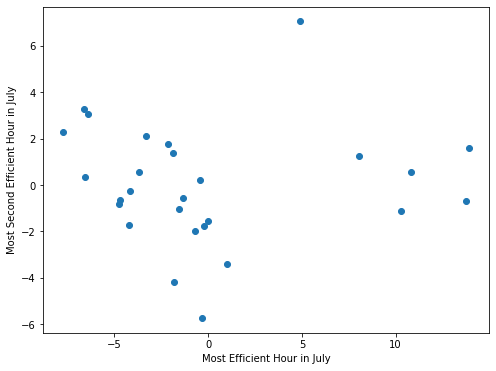

In [142]:
plt.figure(figsize=(8,6))
plt.scatter(Forcast_Dim[:,0],Forcast_Dim[:,1])
plt.xlabel('Most Efficient Hour in July')
plt.ylabel('Most Second Efficient Hour in July')